# 17기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

In [2]:
# 데이터 전처리
import numpy as np
import pandas as pd

# 기계학습 모델(군집화) 생성, 학습, 평가
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# 시각화 & 편의용
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

## 0. 데이터 불러오기

In [3]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [9]:
#범주형 변수 처리

gender = pd.get_dummies(df['Gender'])

In [10]:
df = pd.concat([df,gender],axis=1)

In [11]:
df = df.drop(columns=['Gender'])

In [12]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0


In [13]:
df.columns=['Age','Annual Income','Spending Score','Female','Male']

In [15]:
df2 = pd.read_csv("Mall_Customers.csv", index_col = 0)

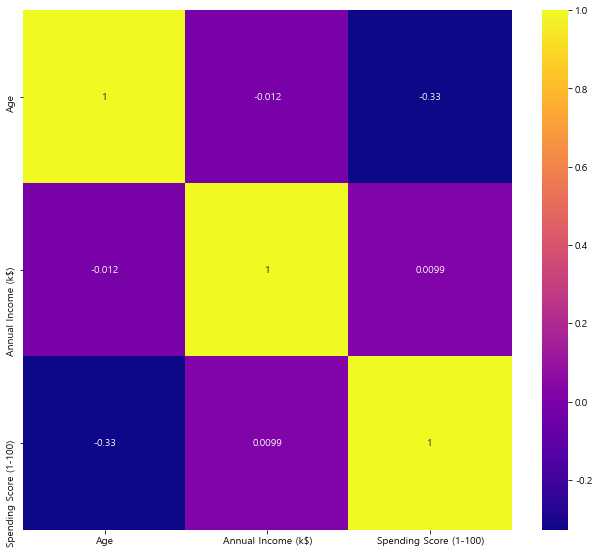

In [16]:
cor = df2.corr()
plt.figure(figsize=(9,8))
sns.heatmap(cor, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

- 위 결과를 보았을 때 나이와 Spending Score이 상관관계를 가질 것이라고 짐작할 수 있다.

In [17]:
df.head()
#Female과 Male은 상반되는 변수이기 때문에 둘 중 하나만 사용해도 될 것 같아 하나를 제외

,Age,Annual Income,Spending Score,Female,Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0


In [18]:
df = df.drop(columns=['Male'])

In [19]:
df.head()

,Age,Annual Income,Spending Score,Female
CustomerID,,,,
1,19,15,39,0
2,21,15,81,0
3,20,16,6,1
4,23,16,77,1
5,31,17,40,1


Text(0.5, 1.0, 'Age & Spending Score')

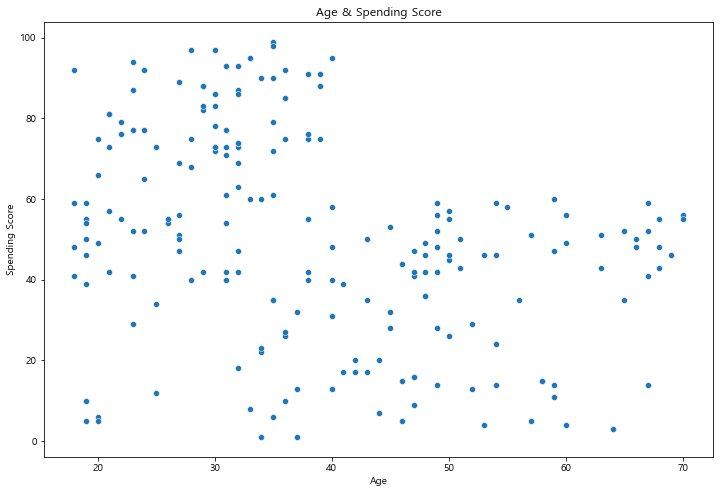

In [21]:
# Age와 Spending Score의 산점도

plt.figure(figsize=(12,8))
sns.scatterplot(x = df['Age'], y = df['Spending Score'])
plt.title('Age & Spending Score')

In [29]:
# 표준화

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df.iloc[:,:-1])
X

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [32]:
X = pd.DataFrame(X)

In [37]:
df = df.reset_index(drop=True)
df

,Age,Annual Income,Spending Score,Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


In [38]:
df1 = pd.concat([df,X],axis=1)
df1

,Age,Annual Income,Spending Score,Female,0,1,2
0,19,15,39,0,-1.424569,-1.738999,-0.434801
1,21,15,81,0,-1.281035,-1.738999,1.195704
2,20,16,6,1,-1.352802,-1.700830,-1.715913
3,23,16,77,1,-1.137502,-1.700830,1.040418
4,31,17,40,1,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...,...,...
195,35,120,79,1,-0.276302,2.268791,1.118061
196,45,126,28,1,0.441365,2.497807,-0.861839
197,32,126,74,0,-0.491602,2.497807,0.923953
198,32,137,18,0,-0.491602,2.917671,-1.250054


In [39]:
#Age, Annual Income, Spending Score 삭제
df1 = df1.drop(columns=['Age','Annual Income','Spending Score'])

,Female,0,1,2
0,0,-1.424569,-1.738999,-0.434801
1,0,-1.281035,-1.738999,1.195704
2,1,-1.352802,-1.700830,-1.715913
3,1,-1.137502,-1.700830,1.040418
4,1,-0.563369,-1.662660,-0.395980


In [40]:
df1.columns=['Female','Age_sc','Annual income_sc','Spending Score_sc']

In [41]:
df1.head()

,Female,Age_sc,Annual income_sc,Spending Score_sc
0,0,-1.424569,-1.738999,-0.434801
1,0,-1.281035,-1.738999,1.195704
2,1,-1.352802,-1.700830,-1.715913
3,1,-1.137502,-1.700830,1.040418
4,1,-0.563369,-1.662660,-0.395980


In [47]:
#상관계수가 높았던 Age_sc와 Spending Score_sc만을 사용

In [51]:
df_age = df1.iloc[:,1]
df_age.head()

0   -1.424569
1   -1.281035
2   -1.352802
3   -1.137502
4   -0.563369
Name: Age_sc, dtype: float64

In [52]:
df_spend = df1.iloc[:,3]
df_spend.head()

0   -0.434801
1    1.195704
2   -1.715913
3    1.040418
4   -0.395980
Name: Spending Score_sc, dtype: float64

In [53]:
# clustering에 들어갈 데이터
df_clu = pd.concat([df_age,df_spend],axis=1)
df_clu.head()

,Age_sc,Spending Score_sc
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


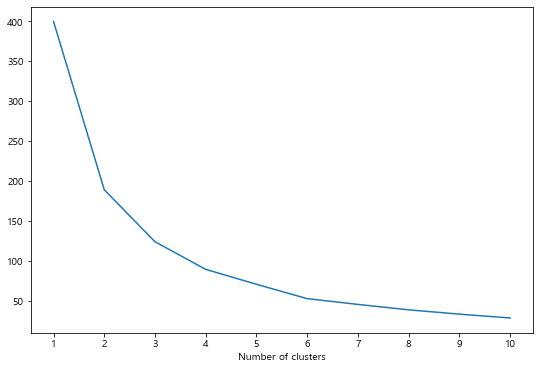

In [54]:
# K-means에 적합한 k값 찾기
from sklearn.cluster import KMeans
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(df_clu)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.show()

위의 결과를 토대로 k를 4로 설정한다.

In [55]:
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
pred_kmeans = kmeans.fit_predict(df_clu)

In [60]:
df_clu['cluster'] = kmeans.labels_

In [63]:
df_clu.head()

,Age_sc,Spending Score_sc,cluster
0,-1.424569,-0.434801,2
1,-1.281035,1.195704,0
2,-1.352802,-1.715913,2
3,-1.137502,1.040418,0
4,-0.563369,-0.395980,2


No handles with labels found to put in legend.


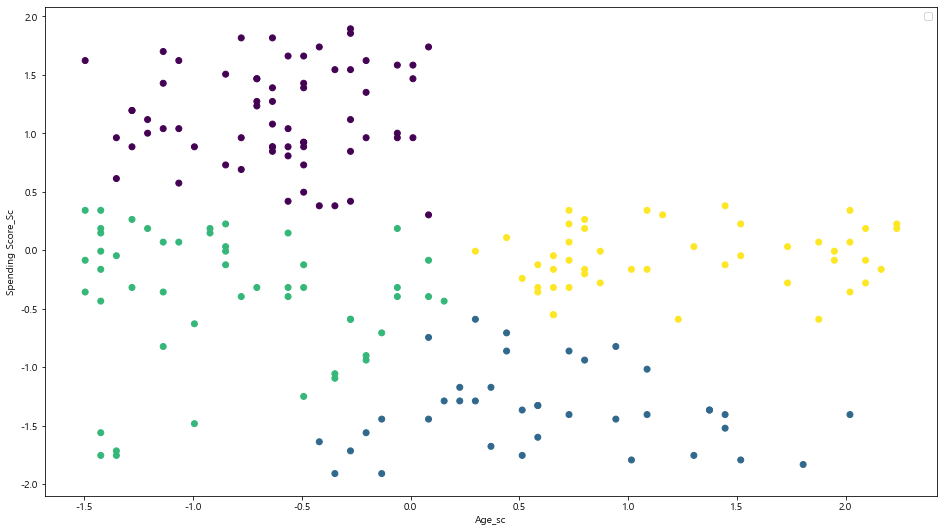

In [69]:
plt.figure(1 , figsize = (16 ,9))
plt.scatter(df_clu['Age_sc'], df_clu['Spending Score_sc'], c = df_clu['cluster'])
plt.xlabel("Age_sc")
plt.ylabel("Spending Score_Sc")
plt.legend()
plt.show()

- 왼쪽 위의 클러스터 : 나이가 어리고 소비점수가 높은 그룹
- 왼쪽 아래 클러스터 : 나이가 어리고 소비점수가 낮은 그룹
- 오른쪽 위의 클러스터 : 나이가 많고 소비점수가 높은 그룹
- 오른쪽 아래의 클러스터 : 나이가 많고 소비점수가 낮은 그룹

k를 6으로 바꿔서 같은 과정 실행

No handles with labels found to put in legend.


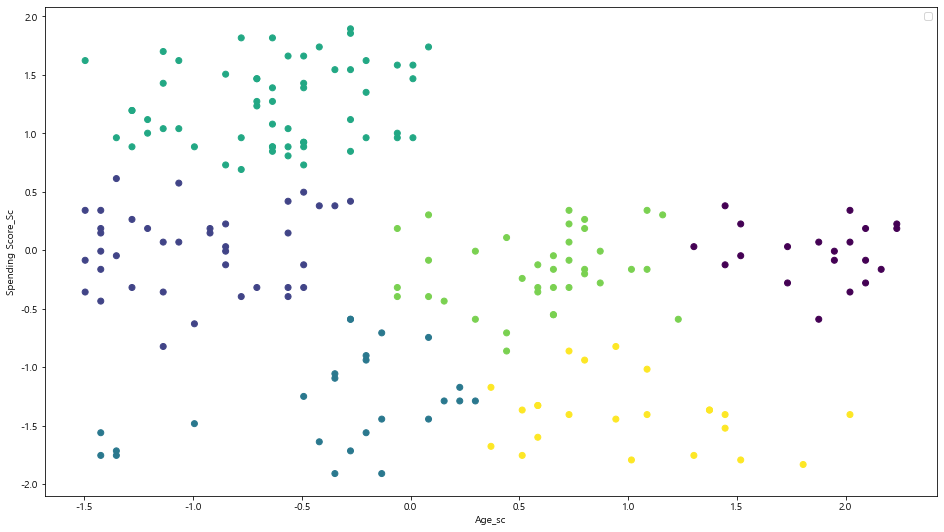

In [70]:
kmeans = KMeans(n_clusters = 6, init ='k-means++', random_state=88)
pred_kmeans = kmeans.fit_predict(df_clu.iloc[:,:2])
df_clu['cluster_6'] = kmeans.labels_
plt.figure(1 , figsize = (16 ,9))
plt.scatter(df_clu['Age_sc'], df_clu['Spending Score_sc'], c = df_clu['cluster_6'])
plt.xlabel("Age_sc")
plt.ylabel("Spending Score_Sc")
plt.legend()
plt.show()

4개의 그룹으로 나눴을 때 보다는 세부적이지만 뚜렷한 차이가 보이지 않음을 볼 수 있다.
- 진한 초록색 : 나이가 적으며 소비 점수가 높은 그룹
- 남색 : 나이가 적으며 소비점수가 평균인 그룹
- 청색 : 나이가 적으며 소비점수가 낮은 그룹
- 연두색 : 나이가 평균이며 소비점수가 평균인 그룹
- 노란색 : 나이가 높으며 소비점수가 낮은 그룹
- 검은색 : 나이가 높으며 소비점수가 높은 그룹

## 계층적 군집화
### 덴드로그램 그려보기

In [124]:
df_link = df_clu.iloc[:,:2]

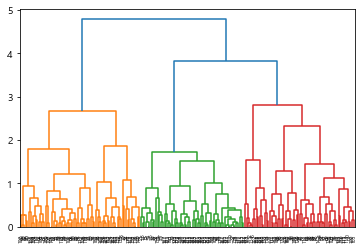

In [125]:
linkage_matrix = linkage(df_link, method='complete')
_ = dendrogram(linkage_matrix, color_threshold = 3)

In [127]:
model = AgglomerativeClustering(
    linkage = 'complete',
    affinity = 'euclidean',
    n_clusters = 4)
_results = model.fit_predict(df_link)
cluster_results['complete'] = _results
df_link['complete'] = _results

Text(0, 0.5, 'Spending Score_Sc')

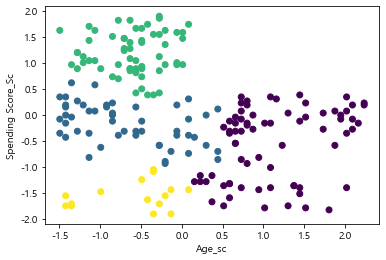

In [128]:
plt.scatter(df_link['Age_sc'], df_link['Spending Score_sc'], c = df_link['complete'])
plt.xlabel("Age_sc")
plt.ylabel("Spending Score_Sc")

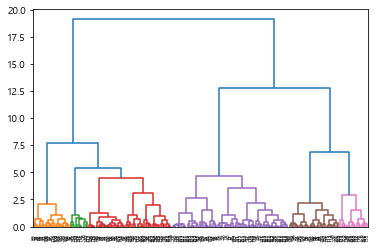

In [87]:
linkage_matrix_2 = linkage(df_link, method='ward')
_ = dendrogram(linkage_matrix_2, color_threshold = 5)

In [129]:
model = AgglomerativeClustering(
    linkage = 'ward',
    affinity = 'euclidean',
    n_clusters = 4)
_results = model.fit_predict(df_link)
cluster_results['ward'] = _results
df_link['ward'] = _results

Text(0, 0.5, 'Spending Score_Sc')

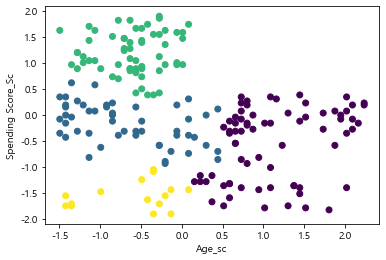

In [130]:
plt.scatter(df_link['Age_sc'], df_link['Spending Score_sc'], c = df_link['ward'])
plt.xlabel("Age_sc")
plt.ylabel("Spending Score_Sc")

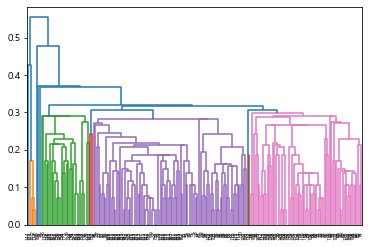

In [97]:
linkage_matrix_3 = linkage(df_link, method='single')
_ = dendrogram(linkage_matrix_3, color_threshold = 0.3)

In [131]:
model = AgglomerativeClustering(
    linkage = 'single',
    affinity = 'euclidean',
    n_clusters = 4)
_results = model.fit_predict(df_link)
cluster_results['single'] = _results
df_link['single'] = _results

Text(0, 0.5, 'Spending Score_Sc')

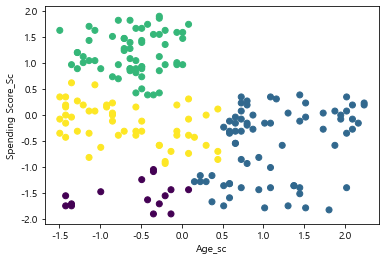

In [132]:
plt.scatter(df_link['Age_sc'], df_link['Spending Score_sc'], c = df_link['single'])
plt.xlabel("Age_sc")
plt.ylabel("Spending Score_Sc")

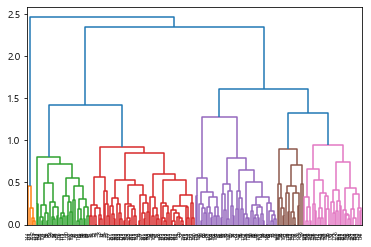

In [98]:
linkage_matrix_4 = linkage(df_link, method='average')
_ = dendrogram(linkage_matrix_4, color_threshold = 1.3)

In [133]:
model = AgglomerativeClustering(
    linkage = 'average',
    affinity = 'euclidean',
    n_clusters = 4)
_results = model.fit_predict(df_link)
cluster_results['average'] = _results
df_link['average'] = _results

Text(0, 0.5, 'Spending Score_Sc')

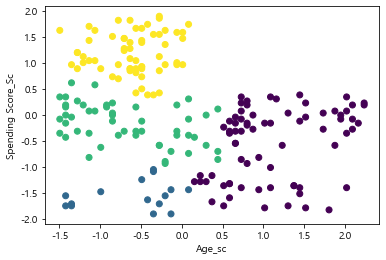

In [134]:
plt.scatter(df_link['Age_sc'], df_link['Spending Score_sc'], c = df_link['average'])
plt.xlabel("Age_sc")
plt.ylabel("Spending Score_Sc")

- 계층적 군집화를 사용했을 때 또한 군집화가 잘 되는 것을 볼 수 있다.
- k-means를 사용했을 때와 달리 다음의 네가지 그룹으로 나뉘는 것을 볼 수 있다.
1. Age가 높은 그룹
2. Age가 낮으면서 Spending_Score도 낮은 그룹
3. Age가 낮으면서 Spending_Score가 평균인 그룹
4. Age가 낮으면서 Spending_Score가 높은 그룹

## DBSCAN 군집화

In [135]:
df_dbscan = df_clu.iloc[:,:2]

In [150]:
# 모델 정의
model = DBSCAN(
    min_samples = 5,
    metric='euclidean')

# 학습
dbscan_clusters = model.fit_predict(df_dbscan)

In [151]:
df_dbscan['DBSCAN'] = dbscan_clusters

In [152]:
df_dbscan.head()

,Age_sc,Spending Score_sc,DBSCAN
0,-1.424569,-0.434801,0
1,-1.281035,1.195704,0
2,-1.352802,-1.715913,1
3,-1.137502,1.040418,0
4,-0.563369,-0.395980,0


In [153]:
np.unique(df_dbscan['DBSCAN'])

array([-1,  0,  1], dtype=int64)

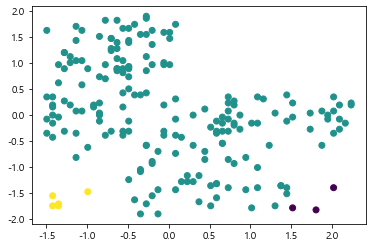

In [155]:
#시각화
plt.scatter(df_dbscan['Age_sc'], df_dbscan['Spending Score_sc'], c = df_dbscan['DBSCAN'])
plt.show()

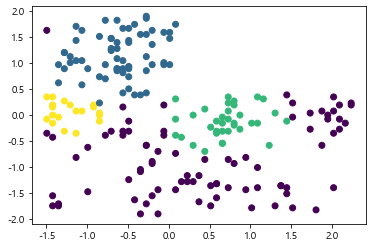

In [158]:
# 모델 정의
model = DBSCAN(
    min_samples = 20,
    metric='euclidean')

# 학습
dbscan_clusters = model.fit_predict(df_dbscan)

df_dbscan['DBSCAN_20'] = dbscan_clusters

#시각화
plt.scatter(df_dbscan['Age_sc'], df_dbscan['Spending Score_sc'], c = df_dbscan['DBSCAN_20'])
plt.show()

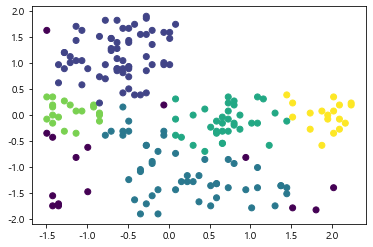

In [160]:
# 모델 정의
model = DBSCAN(
    min_samples = 10,
    metric='euclidean')

# 학습
dbscan_clusters = model.fit_predict(df_dbscan)

df_dbscan['DBSCAN_10'] = dbscan_clusters

#시각화
plt.scatter(df_dbscan['Age_sc'], df_dbscan['Spending Score_sc'], c = df_dbscan['DBSCAN_10'])
plt.show()

- 본 예제에서 정규화한 age와 spending score만을 사용하여 DBSCAN 군집화 하였을 때 앞선 K-means와 계층적 군집화와 같이 뚜렷한 군집화는 보이지 않는다고 볼 수 있다.